# Support Vector Machine(SVM)

Made by Faris D. Qadri | 2021-08-11

Personal and professional use is allowed with permission from author.

[Support Vector Machine method explanation](https://en.wikipedia.org/wiki/Support-vector_machine)

[Source](https://medium.com/analytics-vidhya/what-is-the-support-vector-machine-svm-dc89207c011)

[Code source](https://github.com/abhijeetpujara/Support_Vector_Machines_with_python/blob/master/svm.ipynb)

NB: Data is provided by scikit-learn

## Libraries

In [1]:
# Necessary libraries

## Basic libraries
import pandas as pd

## Data
from sklearn.datasets import load_iris

## Visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Train-Test split
from sklearn.model_selection import train_test_split

## Model
from sklearn.svm import SVC

## Data

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Data is in numpy NDarray form, therefore we need to convert it into pandas.DataFrame form first

### Converting data into pandas.DataFrame

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x]) # giving the real names of the numerical target
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

### Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

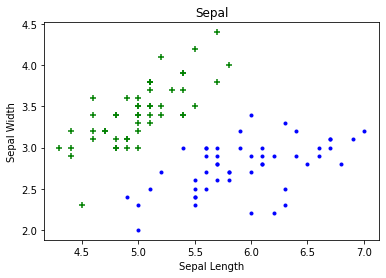

In [11]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Sepal")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

plt.show

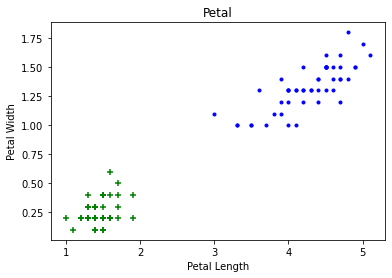

In [12]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Petal")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

plt.show()

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Train-Test split

In [14]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
len(X_train)

120

In [17]:
len(X_test)

30

## Model deployment

Here we try to make a couple different models to see different results by varying the C, gamma, and using linear kernel

In [18]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [19]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [20]:
model_C = SVC(C=1) # C is 1
model_C.fit(X_train, y_train)

SVC(C=1)

In [21]:
model_C_2 = SVC(C=10) # C is 10
model_C_2.fit(X_train, y_train)

SVC(C=10)

In [22]:
model_g = SVC(gamma=10) # Gamma is 10
model_g.fit(X_train, y_train)

SVC(gamma=10)

In [23]:
model_linear_kernal = SVC(kernel='linear') # Using linear kernel
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

## Model evaluation

In [24]:
model.score(X_test, y_test) # Normal model

0.9333333333333333

In [25]:
model_C.score(X_test, y_test) # Model using C = 1

0.9333333333333333

In [26]:
model_C_2.score(X_test, y_test) # Model using C = 10

0.9666666666666667

In [27]:
model_g.score(X_test, y_test) # Model using gamma = 10

0.8666666666666667

In [28]:
model_linear_kernal.score(X_test, y_test) # Model using linear kernel

0.9333333333333333